## 任务介绍

每年国际上召开的大大小小学术会议不计其数，发表了非常多的论文。在计算机领域的一些大型学术会议上，一次就可以发表涉及各个方向的几百篇论文。按论文的主题、内容进行聚类，有助于人们高效地查找和获得所需要的论文。本案例数据来源于AAAI 2014上发表的约400篇文章，由[UCI](https://archive.ics.uci.edu/ml/datasets/AAAI+2014+Accepted+Papers!)公开提供，提供包括标题、作者、关键词、摘要在内的信息，希望大家能根据这些信息，合理地构造特征向量来表示这些论文，并设计实现或调用聚类算法对论文进行聚类。最后也可以对聚类结果进行观察，看每一类都是什么样的论文，是否有一些主题。
 

注：数据中的group和topic也不能完全算是标签，因为
1. 有些文章作者投稿时可能会选择某个group/topic但实际和另外group/topic也相关甚至更相关；
2. 一篇文章可能有多个group和topic，作为标签会出现有的文章同属多个类别，这里暂不考虑这样的聚类； 

## 问题一

将文本转化为向量，实现或调用无监督聚类算法，对论文聚类，例如10类（可使用已有工具包例如sklearn）；

## 问题二

并将聚类结果可视化成散点图

## 问题三

高维向量的降维旨在去除一些高相关性的特征维度，尝试使用PCA进行降维后，再聚类

## 问题四

尝试使用一些评价指标，对聚类后的结果进行评价

In [1]:
# Load the provided CSV data

import pandas as pd

data = pd.read_csv("/mnt/d/coding/codes/ML-all/AAAIpaperCluster/data/[UCI] AAAI-14 Accepted Papers - Papers.csv")
data.head()

,title,authors,groups,keywords,topics,abstract
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Extracting the 'abstract' column from the data to convert it into vectors
abstracts = data['abstract']

# Using TF-IDF to convert the text into vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(abstracts)

# Defining the number of clusters
num_clusters = 10

# Initializing the KMeans model
km = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
km.fit(X)

clusters = km.labels_

# Adding the cluster labels to the original data
data['Cluster'] = clusters

data[['title', 'Cluster']].head(10)

,title,Cluster
0,Kernelized Bayesian Transfer Learning,5
1,"""Source Free"" Transfer Learning for Text Class...",5
2,A Generalization of Probabilistic Serial to Ra...,8
3,Lifetime Lexical Variation in Social Media,6
4,Hybrid Singular Value Thresholding for Tensor ...,0
5,Locality Preserving Hashing,0
6,Discovering Better AAAI Keywords via Clusterin...,8
7,Online Classification Using a Voted RDA Method,0
8,Fraudulent Support Telephone Number Identifica...,7
9,Supervised Hashing for Image Retrieval via Ima...,3


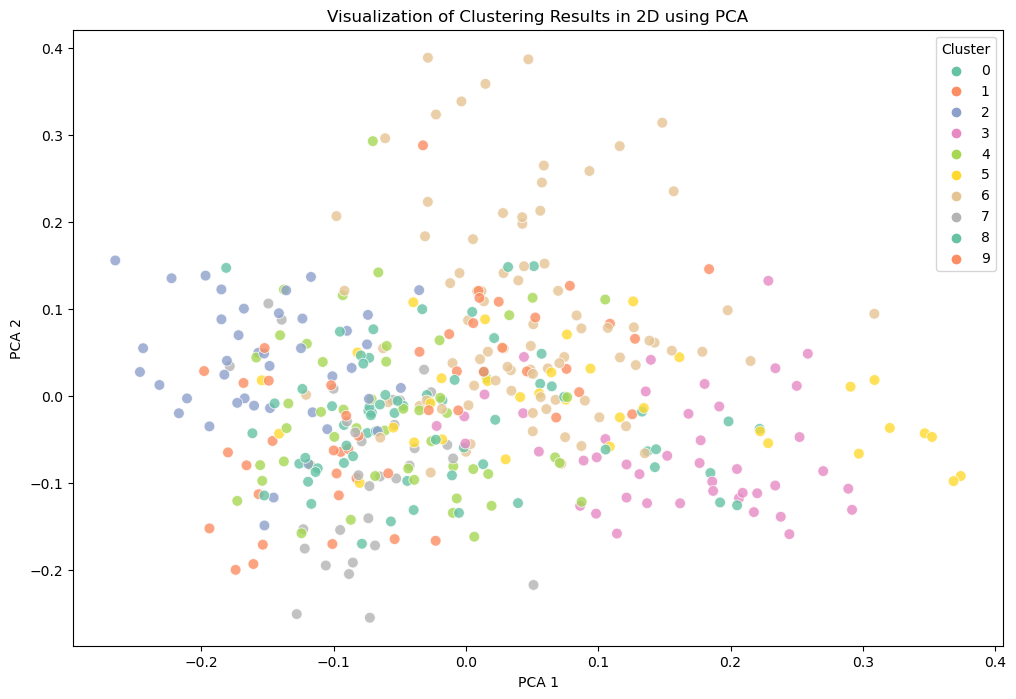

In [7]:
from sklearn.decomposition import PCA

# Reduce the high-dimensional data to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data again without the size misinterpretation
plt.figure(figsize=(12, 8))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette="Set2", s=60, alpha=0.8, legend="full")
plt.title("Visualization of Clustering Results in 2D using PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


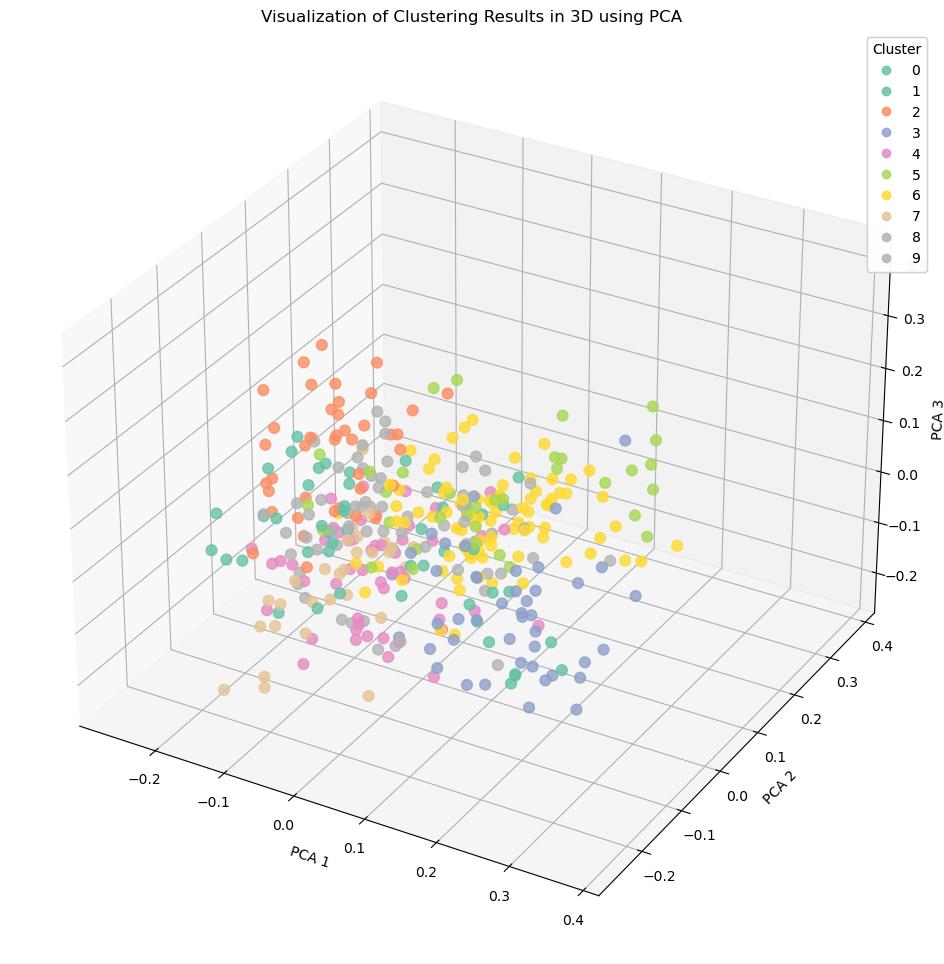

In [9]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Reduce the high-dimensional data to 3 dimensions using PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X.toarray())

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data again without the size misinterpretation
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=clusters, cmap="Set2", s=60, alpha=0.8)
ax.set_title("Visualization of Clustering Results in 3D using PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
legend = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend)
plt.show()



In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Extract the titles and abstracts for clustering
titles = data['title'].tolist()
abstracts = data['abstract'].tolist()

# Generate the TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(abstracts)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
pca_data = pca.fit_transform(tfidf_matrix.toarray())

# Display the shape of the data after PCA
pca_data.shape


(398, 312)

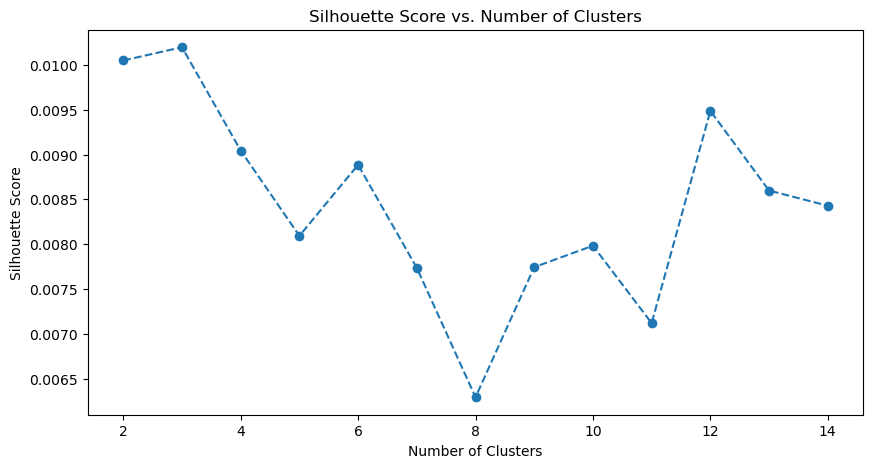

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the silhouette score
scores = []
range_values = range(2, 15)

for i in range_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10, max_iter=300)
    kmeans.fit(pca_data)
    score = silhouette_score(pca_data, kmeans.labels_)
    scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10,5))
plt.plot(range_values, scores, marker='o', linestyle='--')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


从轮廓系数图可以看出，当聚类数量为3时，轮廓系数达到最大。为了进一步的可视化，我们选择3作为聚类数目，并对PCA降维后的数据进行KMeans聚类。然后，我们将使用三维坐标对聚类结果进行可视化。

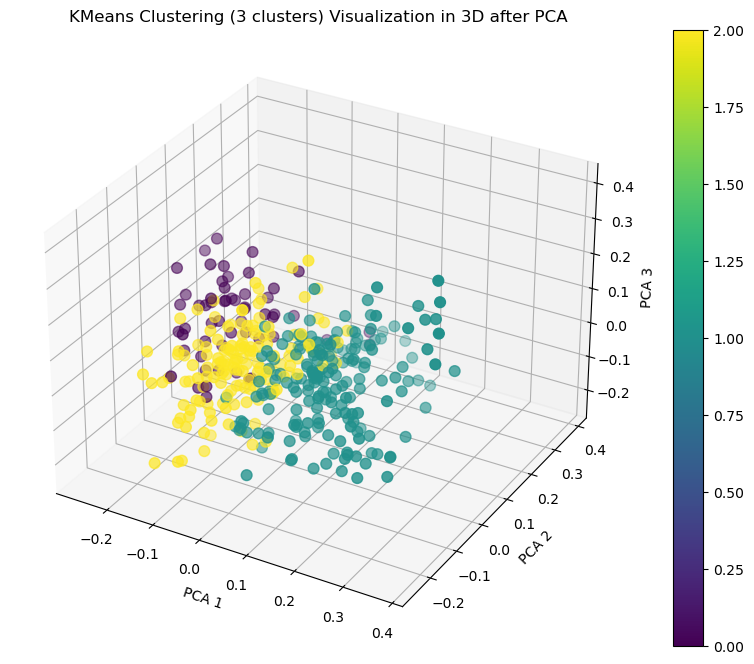

In [13]:
# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10, max_iter=300)
clusters = kmeans.fit_predict(pca_data)

# Visualize the clustering results in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=clusters, s=60, cmap='viridis')
ax.set_title("KMeans Clustering (3 clusters) Visualization in 3D after PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.colorbar(scatter)
plt.show()
